In [1]:
import pandas as pd

# Step 1: Initial Data Inspection

# Loading the dataset
data = pd.read_csv('creditcard_2023.csv')  # Replace with your file path

# Size of the dataset
rows, cols = data.shape

# Data types of each column
data_types = data.dtypes

# Displaying the first few rows of the dataset
print(data.head())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [2]:
# Step 2: Basic Statistics

# Descriptive statistics for numeric features
print(data.describe())

# Value counts for 'Class' column as an example of categorical feature
print(data['Class'].value_counts())

# Step 3: Handling Missing Data

# Detecting missing values
missing_values_counts = data.isnull().sum()
print(missing_values_counts)

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

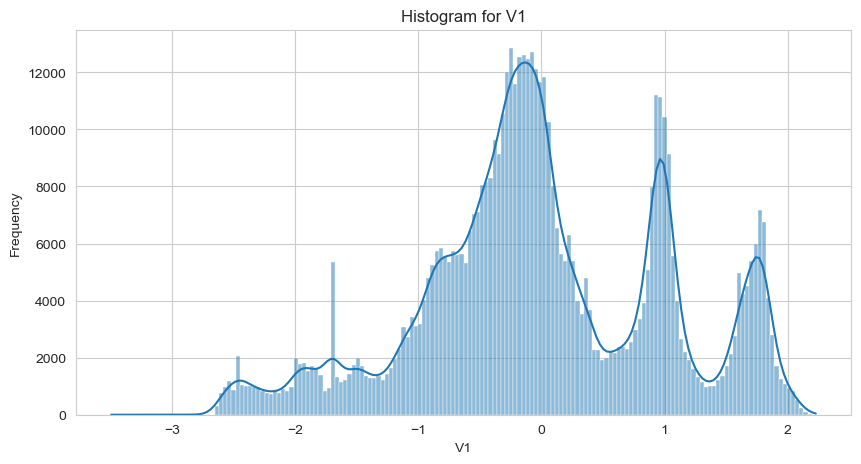

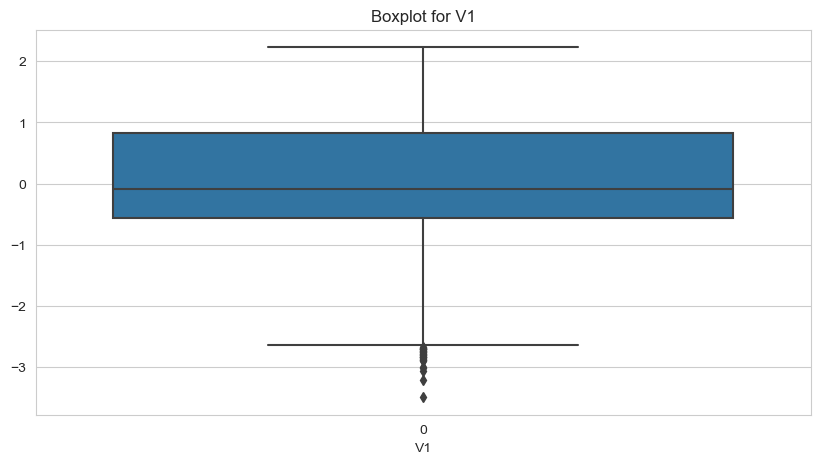

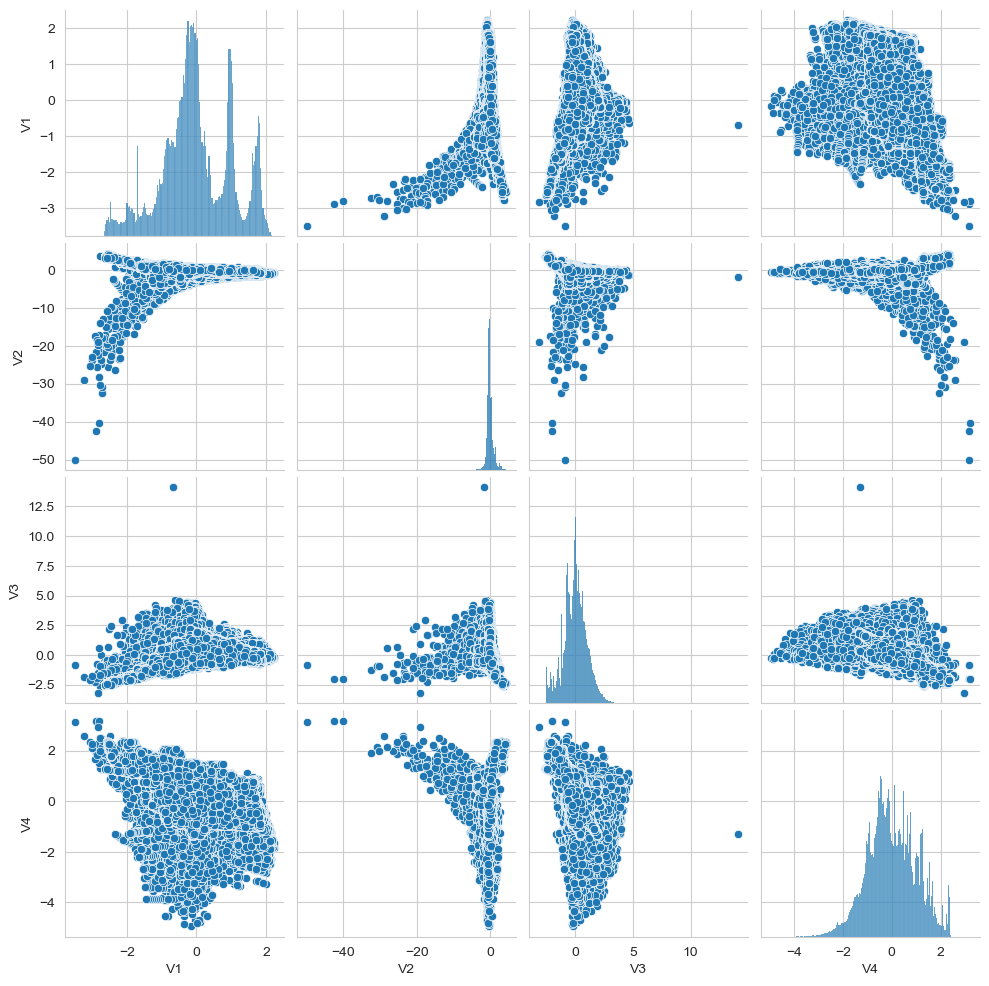

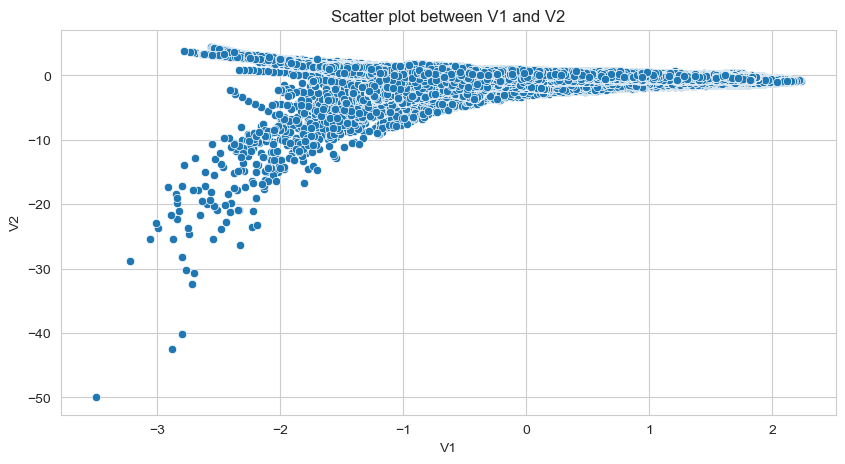

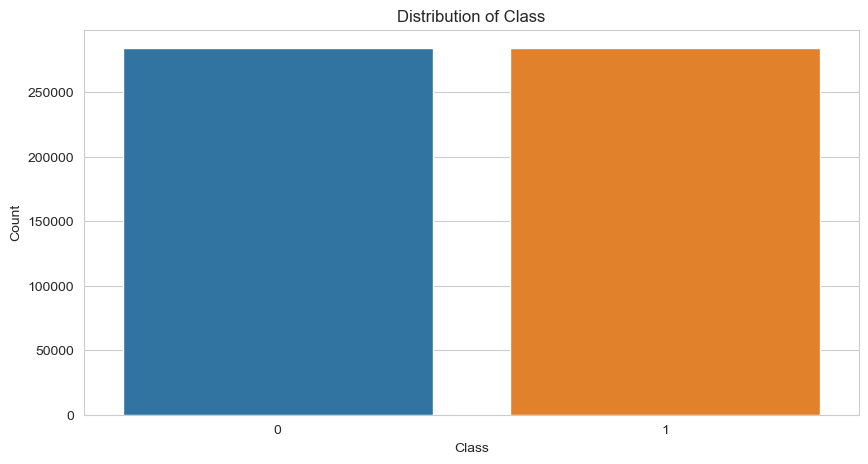

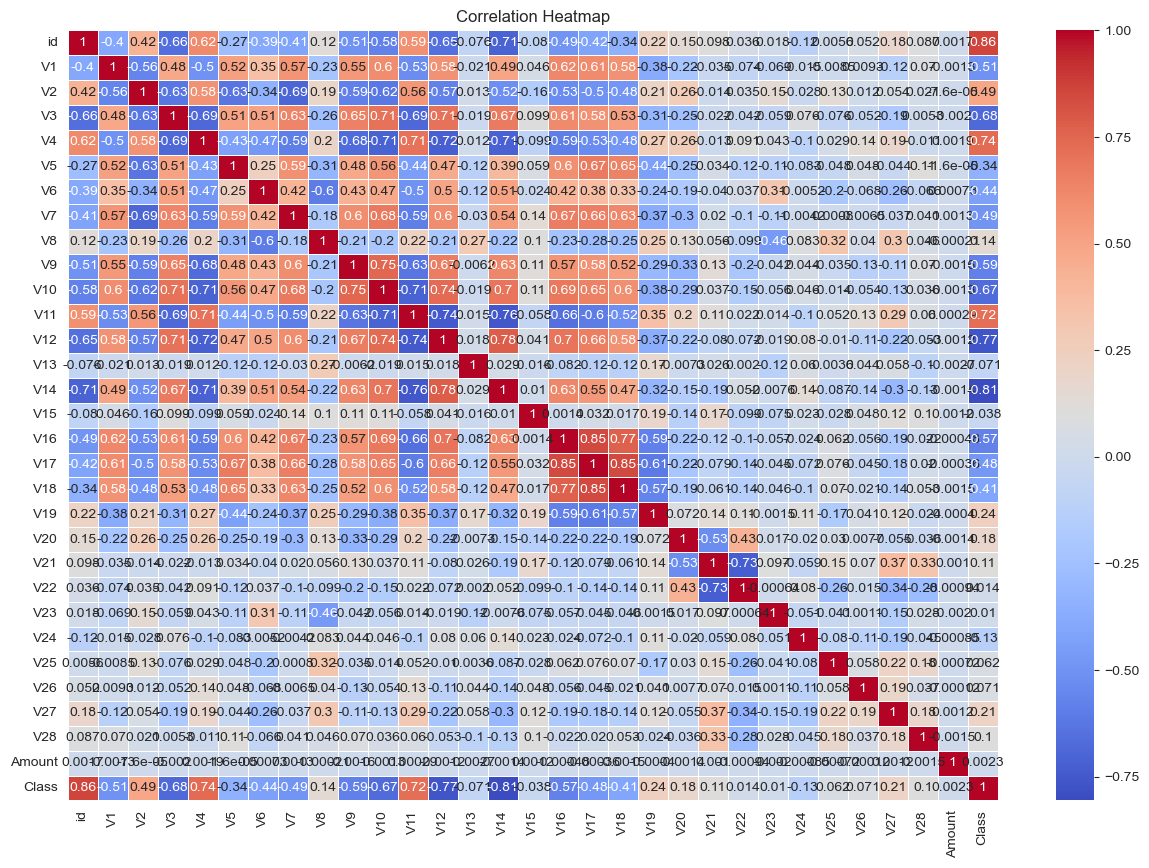

In [3]:
#Visual Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in Jupyter Notebook (remove if you're not using Jupyter)
%matplotlib inline

# Setting a seaborn style
sns.set_style("whitegrid")

# Step 4.1: Histograms and Boxplots

# Histogram for a feature (e.g., V1)
plt.figure(figsize=(10, 5))
sns.histplot(data['V1'], kde=True)
plt.title('Histogram for V1')
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.show()

# Boxplot for a feature (e.g., V1)
plt.figure(figsize=(10, 5))
sns.boxplot(data['V1'])
plt.title('Boxplot for V1')
plt.xlabel('V1')
plt.show()

# Step 4.2: Pairplots and Scatter Plots

# Pairplot for the first few features for visualization (can be adjusted for other features)
sns.pairplot(data[['V1', 'V2', 'V3', 'V4']])
plt.show()

# Scatter plot between two features (e.g., V1 and V2)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['V1'], y=data['V2'])
plt.title('Scatter plot between V1 and V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

# Step 4.3: Bar plots

# Bar plot for 'Class' distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Step 4.4: Heatmaps

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for the 'Amount' column
scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop the original 'Amount' column as we now have 'Scaled_Amount'
data.drop(['Amount'], axis=1, inplace=True)

# If you want to work with a subset of data (e.g., 50% of the dataset), you can sample it:
# data_sample = data.sample(frac=0.5, random_state=42)

# Display the first few rows of the processed dataset
print(data.head())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28  Class  Scal

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

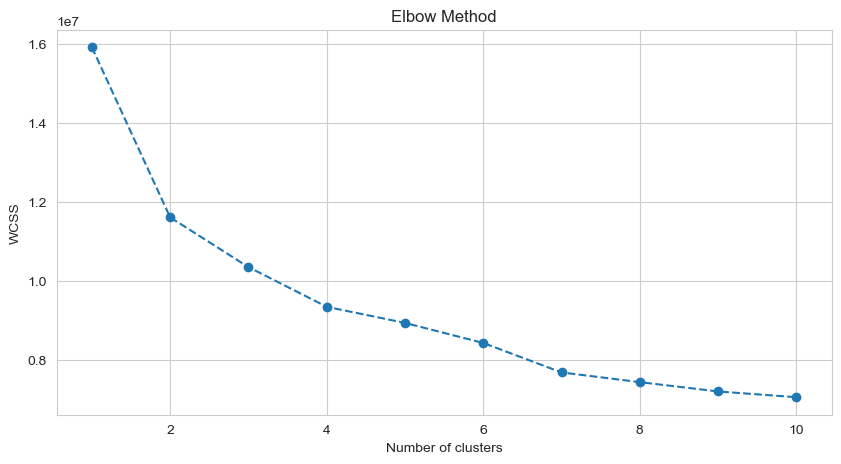

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0 -0.130006  0.727159  ...  0.217606 -0.134794  0.165959  0.126280 -0.434824   
1 -0.133118  0.347452  ... -0.605761  0.079469 -0.577395  0.190090  0.296503   
2 -0.095576 -0.261297  ...  0.702906  0.945045 -1.154666 -0.605564 -0.312895   
3 -0.065130 -0.205698  ... -0.038212 -0.214048 -1.893131  1.003963 -0.515950   
4 -0.212660  1.049921  ...  0.729727 -0.161666  0.312561 -0.414116  1.071126   

        V27       V28  Class  Scaled_Amount 

In [5]:
#K-Means

from sklearn.cluster import KMeans

# Elbow method to determine optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Considering 1-10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data.drop(columns=['id', 'Class', 'Scaled_Amount']))
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# After determining the optimal number of clusters from the plot:
optimal_clusters = 3  # This is an example; replace with the number you determine from the plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data.drop(columns=['id', 'Class', 'Scaled_Amount']))

# Adding cluster assignments to the original data
data['Cluster'] = clusters

# Displaying the first few rows with cluster assignments
print(data.head())


In [6]:
# Distribution of 'Class' within each cluster
cluster_class_distribution = data.groupby('Cluster')['Class'].value_counts().unstack()
print(cluster_class_distribution)

# Size of each cluster
cluster_sizes = data['Cluster'].value_counts()
print(cluster_sizes)


Class         0       1
Cluster                
0        284238   52809
1            27   70012
2            50  161494
0    337047
2    161544
1     70039
Name: Cluster, dtype: int64


In [7]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin score
db_score = davies_bouldin_score(data.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster']), data['Cluster'])

print(f"Davies-Bouldin Score: {db_score}")



Davies-Bouldin Score: 1.6894269866535196


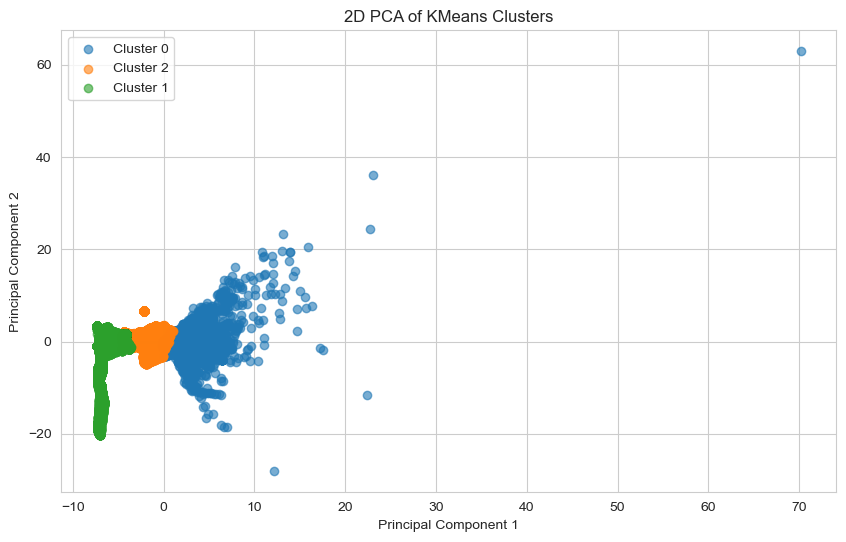

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster']))

# Create a DataFrame with the two principal components and the cluster assignments
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = data['Cluster']

# 2. Plot the 2D PCA results colored by KMeans cluster
plt.figure(figsize=(10, 6))
for cluster in pc_df['Cluster'].unique():
    plt.scatter(pc_df[pc_df['Cluster'] == cluster]['PC1'],
                pc_df[pc_df['Cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of KMeans Clusters')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
from sklearn.cluster import MiniBatchKMeans

# Apply MiniBatchKMeans
mbkmeans = MiniBatchKMeans(n_clusters=3, batch_size=100)  # example number of clusters and batch size
data['MiniBatchKMeans_Cluster'] = mbkmeans.fit_predict(data.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster']))

# Extract clusters
clusters = len(set(data['MiniBatchKMeans_Cluster']))

print(f"Number of clusters: {clusters}")



Number of clusters: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [9]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin score
db_score = davies_bouldin_score(data.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster', 'MiniBatchKMeans_Cluster']), data['MiniBatchKMeans_Cluster'])

print(f"Davies-Bouldin Score: {db_score}")



Davies-Bouldin Score: 1.7076919104692239


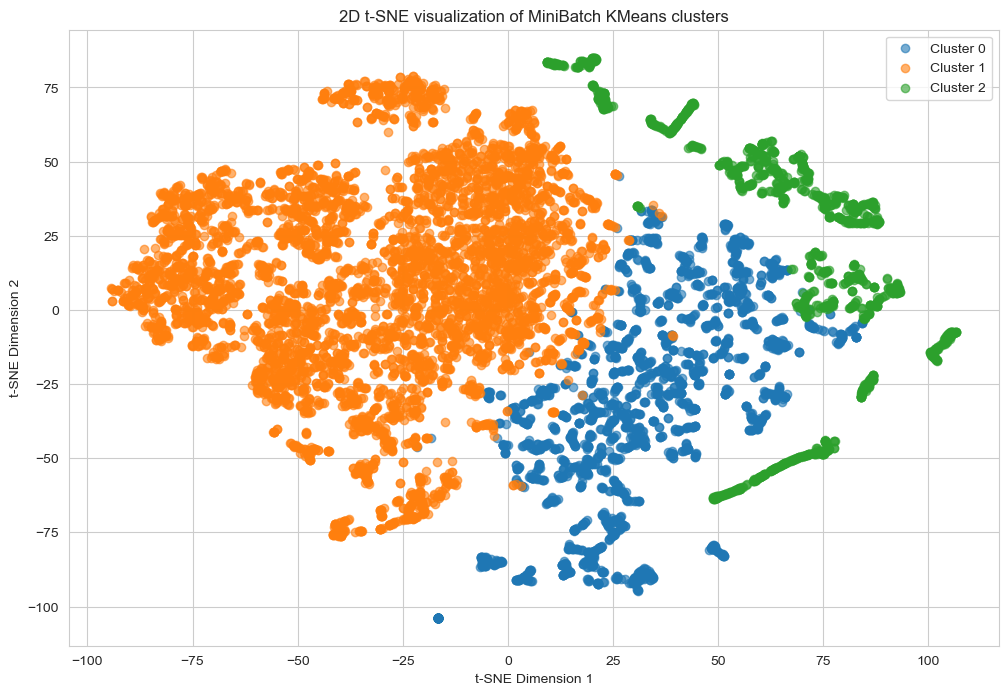

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensions using PCA first
pca = PCA(n_components=20)  # Reduce to 20 components
data_pca = pca.fit_transform(data.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster']))

# Sample a subset of your data for t-SNE
sample_size = 10000  # Adjust as needed
data_sample = data.sample(n=sample_size, random_state=42)
data_pca_sample = data_pca[data_sample.index]

# Reduce dimensions further using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(data_pca_sample)

# Plot the clusters
plt.figure(figsize=(12, 8))
for cluster_num in set(data_sample['MiniBatchKMeans_Cluster']):
    cluster_data = reduced_data[data_sample['MiniBatchKMeans_Cluster'] == cluster_num]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_num}", alpha=0.6)

plt.legend()
plt.title("2D t-SNE visualization of MiniBatch KMeans clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()



In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import numpy as np
import random

# Sample 5% of the data
small_sample = data.sample(frac=0.05, random_state=42)

# Define ranges for hyperparameters
eps_range = np.arange(0.5, 5, 0.5)
min_samples_range = list(range(2, 20))

# Track the best parameters and score
best_eps = None
best_min_samples = None
best_score = float('inf')  # Start with infinity, so any score is better

# Number of random combinations to test
n_iterations = 20

for _ in range(n_iterations):
    # Randomly select hyperparameters
    eps = random.choice(eps_range)
    min_samples = random.choice(min_samples_range)

    # Apply DBSCAN with the chosen hyperparameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(small_sample.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster', 'MiniBatchKMeans_Cluster']))

    # Check if we have more than one cluster (excluding noise)
    if len(set(labels)) > 2:  # Considering -1 as noise
        score = davies_bouldin_score(small_sample.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster', 'MiniBatchKMeans_Cluster']), labels)

        # Update best score and parameters if current score is better
        if score < best_score:
            best_eps = eps
            best_min_samples = min_samples
            best_score = score

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Davies-Bouldin Score: {best_score}")




Best eps: 0.5
Best min_samples: 17
Best Davies-Bouldin Score: 1.1220007281430773


In [12]:
# Sampling 20% of the data
sample_data = data.sample(frac=0.2, random_state=42)

# Apply DBSCAN on the 20% sampled data with the best hyperparameters
dbscan = DBSCAN(eps=0.5, min_samples=17)
sample_data['DBSCAN_Cluster'] = dbscan.fit_predict(sample_data.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster', 'MiniBatchKMeans_Cluster']))

# Extract clusters and noise
clusters = len(set(sample_data['DBSCAN_Cluster'])) - (1 if -1 in sample_data['DBSCAN_Cluster'].values else 0)  # -1 represents noise in DBSCAN
noise = list(sample_data['DBSCAN_Cluster'].values).count(-1)

print(f"Number of clusters: {clusters}")
print(f"Number of noise points: {noise}")


Number of clusters: 412
Number of noise points: 70988


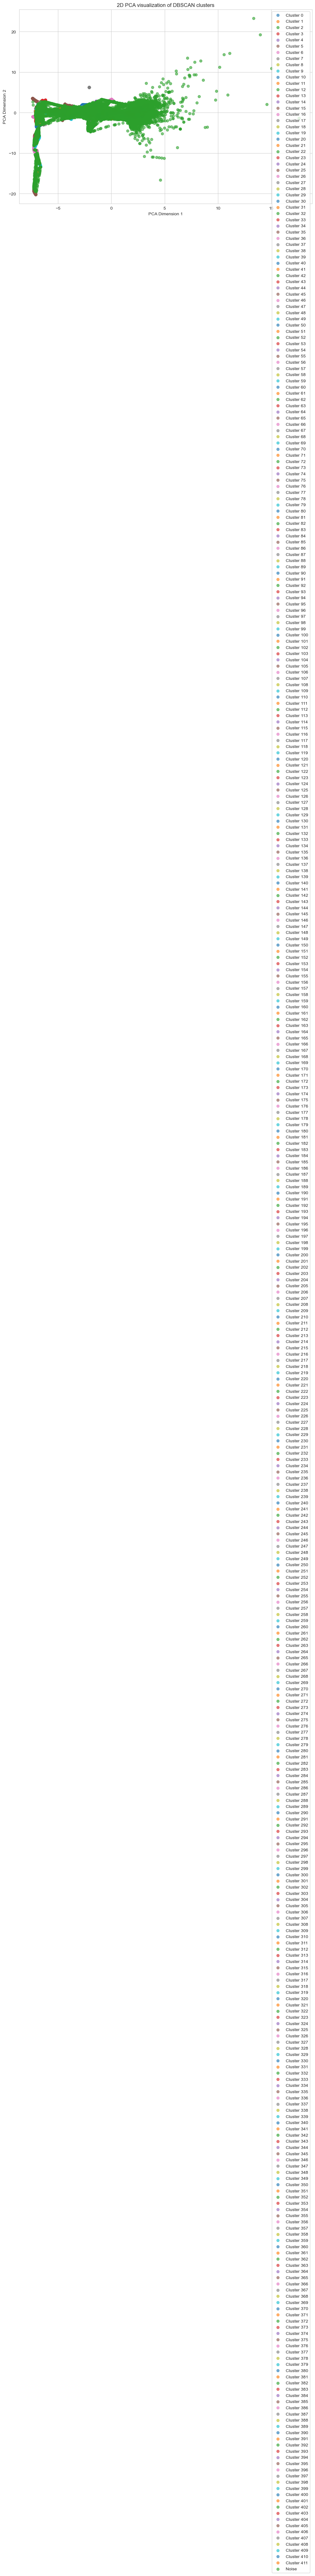

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sample_data.drop(columns=['id', 'Class', 'Scaled_Amount', 'Cluster', 'MiniBatchKMeans_Cluster', 'DBSCAN_Cluster']))

# Plot the clusters
plt.figure(figsize=(12, 8))
for cluster_num in set(sample_data['DBSCAN_Cluster']):
    cluster_data = reduced_data[sample_data['DBSCAN_Cluster'] == cluster_num]
    if cluster_num == -1:
        label = 'Noise'
    else:
        label = f"Cluster {cluster_num}"
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=label, alpha=0.6)

plt.legend()
plt.title("2D PCA visualization of DBSCAN clusters")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()
